<a href="https://colab.research.google.com/github/TruongVuGoBrrrrr/BaiTapAI20104074/blob/BTVN-NhanDien/NhanDienDoAnVN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [9]:
train_image = '/content/drive/MyDrive/Data Train/Mon an Viet Nam/Train'
valid_image = '/content/drive/MyDrive/Data Train/Mon an Viet Nam/Val'

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_set = train_datagen.flow_from_directory(train_image,target_size=(200,200),class_mode='categorical')
validation_set = validation_datagen.flow_from_directory(valid_image,target_size=(200,200),class_mode='categorical')

Found 150 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [11]:
x_train,y_train=next(train_set)
x_train.shape

(32, 200, 200, 3)

In [12]:
y_train.shape

(32, 3)

In [14]:
label=['Banh Mi','Banh xeo','Pho']

In [13]:
from keras.models import Sequential, Model 
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import models
from keras.layers import Conv2D, MaxPooling2D

In [15]:
mod = models.Sequential()
mod.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(200,200,3),padding='same'))

In [16]:
mod.add(MaxPooling2D((2,2),padding='same'))
mod.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
mod.add(MaxPooling2D((2,2),padding='same'))
mod.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
mod.add(MaxPooling2D((2,2),padding='same'))
mod.add(Flatten())
mod.add(Dense(128,activation='relu'))
mod.add(Dense(3,activation='softmax'))

In [17]:
mod.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
history=mod.fit(train_set,epochs=20,batch_size=128,verbose=1, validation_data=validation_set, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/20
5/5 [==============================] - 47s 11s/step - loss: 1.8817 - accuracy: 0.3933 - val_loss: 1.1008 - val_accuracy: 0.3333
Epoch 2/20
5/5 [==============================] - 19s 4s/step - loss: 1.0343 - accuracy: 0.4133 - val_loss: 0.9570 - val_accuracy: 0.5667
Epoch 3/20
5/5 [==============================] - 17s 3s/step - loss: 0.9428 - accuracy: 0.5467 - val_loss: 0.8142 - val_accuracy: 0.7333
Epoch 4/20
5/5 [==============================] - 15s 3s/step - loss: 0.8112 - accuracy: 0.6400 - val_loss: 0.8829 - val_accuracy: 0.6000
Epoch 5/20
5/5 [==============================] - 15s 3s/step - loss: 0.8541 - accuracy: 0.5733 - val_loss: 0.5822 - val_accuracy: 0.8000
Epoch 6/20
5/5 [==============================] - 17s 3s/step - loss: 0.7102 - accuracy: 0.6733 - val_loss: 0.6144 - val_accuracy: 0.8333
Epoch 7/20
5/5 [==============================] - 16s 3s/step - loss: 0.6199 - accuracy: 0.7933 - val_loss: 0.3849 - val_accuracy: 0.8667
Epoch 8/20
5/5 [=================

In [18]:
mod.save('NhanDienMonAnVN.h5')

In [19]:
from keras.utils import load_img
from keras.utils import img_to_array,load_img
import numpy as np
from keras.models import load_model
from matplotlib import pyplot as plt

1/1 [==============================] - 0s 209ms/step
[[7.0328033e-01 2.9444642e-04 2.9642522e-01]]
1/1 [==============================] - 0s 72ms/step
Đây là: Banh Mi


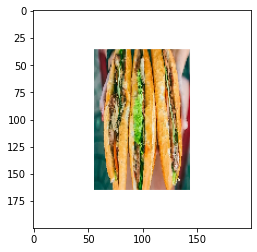

In [20]:
url='/content/Banh mi.png'
img=load_img(url,target_size=(200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img.reshape(1,200,200,3)
img=img/255
print(mod.predict(img))
a= int(np.argmax(mod.predict(img),axis=1))
print("Đây là:",label[a])

1/1 [==============================] - 0s 49ms/step
[[6.9355865e-06 9.9997258e-01 2.0469368e-05]]
1/1 [==============================] - 0s 47ms/step
Đây là: Banh xeo


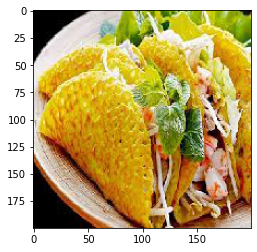

In [23]:
url='/content/download.jpg'
img=load_img(url,target_size=(200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img.reshape(1,200,200,3)
img=img/255
print(mod.predict(img))
a= int(np.argmax(mod.predict(img),axis=1))
print("Đây là:",label[a])